## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Банк (иная финансовая организация) вводит в программу статистические данные — возраст, социальное положение, место проживания, требования к состоянию кредитной истории, трудовая занятость, размер постоянного дохода, семейное положение, и прочие.

Application-scoring (дословный перевод с английского - «скоринг заявки, обращения») - система оценки кредитоспособности заемщиков для получения кредита.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

path = 'C:/Users/Mikhail/оформление/Предобработка данных/'

try:
    data = pd.read_csv(path + 'data.csv')
except:
    data = pd.read_csv('/datasets/data.csv')

data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [2]:
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


(None,
            children  days_employed     dob_years  education_id  \
 count  21525.000000   19351.000000  21525.000000  21525.000000   
 mean       0.538908   63046.497661     43.293380      0.817236   
 std        1.381587  140827.311974     12.574584      0.548138   
 min       -1.000000  -18388.949901      0.000000      0.000000   
 25%        0.000000   -2747.423625     33.000000      1.000000   
 50%        0.000000   -1203.369529     42.000000      1.000000   
 75%        1.000000    -291.095954     53.000000      1.000000   
 max       20.000000  401755.400475     75.000000      4.000000   
 
        family_status_id          debt  total_income  
 count      21525.000000  21525.000000  1.935100e+04  
 mean           0.972544      0.080883  1.674223e+05  
 std            1.420324      0.272661  1.029716e+05  
 min            0.000000      0.000000  2.066726e+04  
 25%            0.000000      0.000000  1.030532e+05  
 50%            0.000000      0.000000  1.450179e+05  
 75

### Вывод

1. отрицательные значения в опыте работы и NaN
2. Разный регистр в столбце education 
3. отсутствие значений в доходах
5. Пропуски значений есть в столбцах days_employed и total_income
6. оставлять ли float или перевести в int?

### Шаг 2. Предобработка данных

### Обработка пропусков

# Пропуски в dob_years

In [3]:
#Пропуски в dob_years

# соотношение пенсионеров с 0 в возрасте к общему числу пенсионеров
pensionire_age_zeros = data[(data['income_type'] == 'пенсионер') & (data['dob_years'] == 0)].count()
pensionire_all = data[(data['income_type'] == 'пенсионер')].count()
pensionire_age_conversion = pensionire_age_zeros / pensionire_all
# соотношение всех респондентов с 0 в возрасте к общему числу респондентов
people_age_zeros = data[(data['income_type'] != 'пенсионер') & (data['dob_years'] == 0)].count()
people_all = data[(data['income_type'] != 'пенсионер')].count()
people_age_conversion = people_age_zeros / people_all
pensionire_age_conversion, people_age_conversion

(children            0.005187
 days_employed       0.004938
 dob_years           0.005187
 education           0.005187
 education_id        0.005187
 family_status       0.005187
 family_status_id    0.005187
 gender              0.005187
 income_type         0.005187
 debt                0.005187
 total_income        0.004938
 purpose             0.005187
 dtype: float64,
 children            0.004584
 days_employed       0.004652
 dob_years           0.004584
 education           0.004584
 education_id        0.004584
 family_status       0.004584
 family_status_id    0.004584
 gender              0.004584
 income_type         0.004584
 debt                0.004584
 total_income        0.004652
 purpose             0.004584
 dtype: float64)

**Процент пропусков в столбце возраста по пенсионерам и всех остальных составляет 0,5% и 0,4%, что менее 1% и может быть удалено.**

In [4]:
# Нулевой возраст в табоице____________________________
data = data.loc[data['dob_years'] != 0]
data = data.reset_index(drop=True)

# Пропуски в days_employed

In [5]:
data['days_employed'] = data['days_employed'].fillna(0) 
data['days_employed'] = abs(data['days_employed'].astype('int64'))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21424 entries, 0 to 21423
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21424 non-null  int64  
 1   days_employed     21424 non-null  int64  
 2   dob_years         21424 non-null  int64  
 3   education         21424 non-null  object 
 4   education_id      21424 non-null  int64  
 5   family_status     21424 non-null  object 
 6   family_status_id  21424 non-null  int64  
 7   gender            21424 non-null  object 
 8   income_type       21424 non-null  object 
 9   debt              21424 non-null  int64  
 10  total_income      19260 non-null  float64
 11  purpose           21424 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
import numpy as np

# Значения опыта превышающие возраст
employ_excess = data[['days_employed', 'dob_years']]
employ_excess['dob_in_days'] = employ_excess['dob_years']*365
employ_excess['compare'] = np.where((employ_excess['dob_in_days'] - employ_excess['days_employed'] >= 5840 ), employ_excess['days_employed'], np.nan)
conversion = employ_excess['compare'].count() / employ_excess['days_employed'].count()
data['days_employed'] = employ_excess['compare']
conversion

<ipython-input-7-ad3cb61d0c1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ_excess['dob_in_days'] = employ_excess['dob_years']*365
<ipython-input-7-ad3cb61d0c1a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ_excess['compare'] = np.where((employ_excess['dob_in_days'] - employ_excess['days_employed'] >= 5840 ), employ_excess['days_employed'], np.nan)


0.8358383121732637

**Значений опыта, превышающих предельно возможный составляет 16,5% - нужно заполнить эти пропуски медианой, что бы не потерять важную часть данных. Заполнение будет происходить мединной для каждого отдельного возраста, что бы не пприводить к существенному искажению распределения характеристики**
https://loginom.ru/blog/missing

In [8]:
dob_years_list = data['dob_years'].unique()
for element in dob_years_list: 
    med = data.loc[data['dob_years'] == element]['days_employed'].median()
    data.loc[data['dob_years'] == element, 'days_employed'] = data.loc[data['dob_years'] == element, 'days_employed'].fillna(med)
    
data_days_employed_median = data['days_employed'].median()
data.loc[data['days_employed'] == 0, 'days_employed'] = data_days_employed_median
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21424 entries, 0 to 21423
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21424 non-null  int64  
 1   days_employed     21424 non-null  float64
 2   dob_years         21424 non-null  int64  
 3   education         21424 non-null  object 
 4   education_id      21424 non-null  int64  
 5   family_status     21424 non-null  object 
 6   family_status_id  21424 non-null  int64  
 7   gender            21424 non-null  object 
 8   income_type       21424 non-null  object 
 9   debt              21424 non-null  int64  
 10  total_income      19260 non-null  float64
 11  purpose           21424 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


# Аномалии в столбце children

In [9]:
data.loc[data['children'] == 20, 'children'] = 2
data.loc[data['children'] == -1, 'children'] = 1
data['children'].value_counts()

0    14080
1     4849
2     2117
3      328
4       41
5        9
Name: children, dtype: int64

**Данные аномалии могут быть связаны с неверным вводом, цифра 2 рядом с цифро 0 на нумпаде.
Значения -1, могли появиться при формировании таблицы, как отрицательные в столбце опыт.**

# Пропуски значений в total_income

In [10]:
income_type_list = data['income_type'].unique()
for element in income_type_list: 
    med = data.loc[data['income_type'] == element]['total_income'].median()
    data.loc[data['income_type'] == element] = data.loc[data['income_type'] == element].fillna(med)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21424 entries, 0 to 21423
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21424 non-null  int64  
 1   days_employed     21424 non-null  float64
 2   dob_years         21424 non-null  int64  
 3   education         21424 non-null  object 
 4   education_id      21424 non-null  int64  
 5   family_status     21424 non-null  object 
 6   family_status_id  21424 non-null  int64  
 7   gender            21424 non-null  object 
 8   income_type       21424 non-null  object 
 9   debt              21424 non-null  int64  
 10  total_income      21424 non-null  float64
 11  purpose           21424 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Пропуски в значениях были заполнены медианным значениями каждой соответсвующей категории работников.
Пропуски не связаны с безработными/студентами т.к. их число крайне мало.**

### Замена типа данных

In [11]:
data['days_employed'] = data['days_employed'].astype('int64')
data['total_income'] = data['total_income'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21424 entries, 0 to 21423
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21424 non-null  int64 
 1   days_employed     21424 non-null  int64 
 2   dob_years         21424 non-null  int64 
 3   education         21424 non-null  object
 4   education_id      21424 non-null  int64 
 5   family_status     21424 non-null  object
 6   family_status_id  21424 non-null  int64 
 7   gender            21424 non-null  object
 8   income_type       21424 non-null  object
 9   debt              21424 non-null  int64 
 10  total_income      21424 non-null  int64 
 11  purpose           21424 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


### Вывод

**Замены типа данных может пригодится в различных арифметических операциях(к примеру float нельзя было возвести в квадрат и затем извлечь корень юез деформации значений)**

### Обработка дубликатов

**Разный регистр в education**

In [12]:
data['education'] = data['education'].str.lower()
data['education'].value_counts(), data['education_id'].value_counts()

(среднее                15169
 высшее                  5225
 неоконченное высшее      742
 начальное                282
 ученая степень             6
 Name: education, dtype: int64,
 1    15169
 0     5225
 2      742
 3      282
 4        6
 Name: education_id, dtype: int64)

In [13]:
data.drop_duplicates()
data.shape

(21424, 12)

### Вывод

**Все дубликаты были связаны с тем, что уровень образования был введен разным регистром.**

### Лемматизация

In [14]:
!pip install pymystem3

In [15]:
from pymystem3 import Mystem
from collections import Counter

m = Mystem()

purpose_list = data['purpose'].unique()
purpose_list

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [16]:
purpose_list = data['purpose'].unique()
lemmas = []
for i in purpose_list:
    lemma = m.lemmatize(i)
    lemmas.append(lemma)
#lemmas

In [17]:
lemmas_count = []
for c in lemmas:
    lemmas_count += Counter(c)
#lemmas_count
#Counter(lemmas_count)
lemmas_purpuse = ['жилье', 'недвижимость', 'автомобиль', 'образование', 'свадьба',] # основные категории

In [18]:
def purpuse_lemmatize (row):
    lemmas_category = m.lemmatize(row)
    if 'жилье' in lemmas_category or 'недвижимость' in lemmas_category:
        return 'недвижимость'
    if 'автомобиль' in lemmas_category:
        return 'автомобиль'
    if 'образование' in lemmas_category:
        return 'образование'
    if 'свадьба' in lemmas_category:
        return 'свадьба'

In [19]:
data['purpose_category'] = data['purpose'].apply(purpuse_lemmatize)

In [20]:
data.sample(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
15757,0,1719,55,среднее,1,женат / замужем,0,F,пенсионер,0,319055,покупка недвижимости,недвижимость
2710,0,332,67,среднее,1,вдовец / вдова,2,F,пенсионер,0,58069,профильное образование,образование
2522,0,2154,49,среднее,1,женат / замужем,0,F,госслужащий,0,97012,приобретение автомобиля,автомобиль
18041,0,2459,39,среднее,1,женат / замужем,0,F,сотрудник,0,221510,строительство жилой недвижимости,недвижимость
12393,2,798,42,среднее,1,женат / замужем,0,M,сотрудник,0,174275,покупка жилья для семьи,недвижимость
12566,0,1827,53,высшее,0,женат / замужем,0,F,пенсионер,0,170868,ремонт жилью,недвижимость
14226,0,1120,65,высшее,0,в разводе,3,F,пенсионер,0,131286,покупка жилья для сдачи,недвижимость
14600,0,1845,36,среднее,1,женат / замужем,0,F,компаньон,0,233223,операции со своей недвижимостью,недвижимость
6704,0,1380,60,среднее,1,женат / замужем,0,F,пенсионер,0,141949,покупка коммерческой недвижимости,недвижимость
5103,1,5319,31,высшее,0,женат / замужем,0,F,сотрудник,0,244334,образование,образование


### Вывод

**Большая часть респондентов берет кредит под одинаковые цели**

### Категоризация данных

Сгруппировать можно:
1. Многодеьные/малодетные
2. По уровню дохода - низкий/средний/высокий

**Группировка по количеству детей**

In [26]:
def children_category_function (number):
    if number < 1:
        return 'Бездетная'
    if 0 < number < 3:
        return 'Малодетная'
    if 3 <= number:
        return 'Многодетная'

In [27]:
data['children_category'] = data['children'].apply(children_category_function)
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,children_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,Малодетная
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,Малодетная
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,Бездетная
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,Многодетная
4,0,1827,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,Бездетная
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21419,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,недвижимость,Малодетная
21420,0,332,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,автомобиль,Бездетная
21421,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,недвижимость,Малодетная
21422,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,автомобиль,Многодетная


**Группировка по доходу**

In [28]:
income_data = data['total_income'].sort_values()
income_data = income_data.reset_index(drop=True)
income_data

0          20667
1          21205
2          21367
3          21695
4          21895
          ...   
21419    1711309
21420    1715018
21421    1726276
21422    2200852
21423    2265604
Name: total_income, Length: 21424, dtype: int64

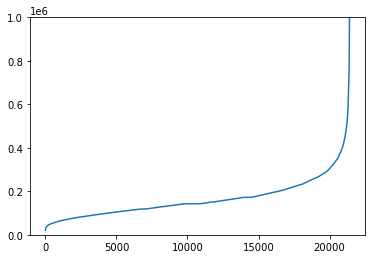

In [49]:
import matplotlib.pyplot as plt

plt.ylim([-5,1000000])

income_data.plot()
plt.show()

Определим границу низкого и среднего дохода с помощью квантилей, определим, что высойкий и низкий доход является 20% верхней и нижней границы, так чтобы на средний доход приходиль более половины доходов, т.к. средний класс имет наибольшее колличество в экономике.

<AxesSubplot:>

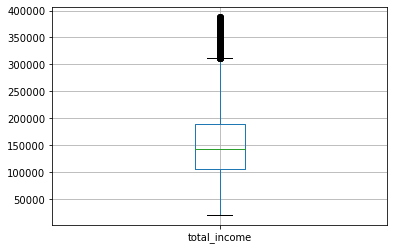

In [53]:
Q1 = data['total_income'].quantile(0.2)
Q3 = data['total_income'].quantile(0.8)
IQR = Q3 - Q1

data.query('(@Q1 - 1.5 * @IQR) <= total_income <= (@Q3 + 1.5 * @IQR)').boxplot('total_income')

In [54]:
Q1

98690.6

In [55]:
Q3

214206.6

Распределим категории по доходам так, менее 100000 - низкий доход, более 215000 - высокий, интервал между - средний доход

In [56]:
low_income_count = data.loc[data['total_income'] < 100000, 'total_income'].count()
high_income_count = data.loc[data['total_income'] > 215000, 'total_income'].count()
medium_income_count = data.loc[(data['total_income'] > 100000) & (data['total_income'] < 215000), 'total_income'].count()
low_income_count, high_income_count, medium_income_count

(4440, 4247, 12737)

Диапазоны для определения категории по доходам.

In [58]:
def total_income_category (income):
    if income < 100000:
        return 'Низкий доход'
    if 100000 < income < 215000:
        return 'Средний доход'
    if income > 215000:
        return 'Высокий доход'

In [59]:
data['total_income_category'] = data['total_income'].apply(total_income_category)

In [60]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,children_category,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,Малодетная,Высокий доход
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,Малодетная,Средний доход
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,Бездетная,Средний доход
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,Многодетная,Высокий доход
4,0,1827,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,Бездетная,Средний доход
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21419,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,недвижимость,Малодетная,Высокий доход
21420,0,332,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,автомобиль,Бездетная,Средний доход
21421,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,недвижимость,Малодетная,Низкий доход
21422,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,автомобиль,Многодетная,Высокий доход


### Вывод

**Выявление дополнительных категорий может помочь в дальнейшем анализе и выявления корреляции в данных.**

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [61]:
data_children_corr = data[['children_category', 'debt']]
data_children_corr = data_children_corr.groupby(['children_category']).agg({'debt':['count', 'sum']})

In [62]:
data_children_corr['correlation'] = data_children_corr['debt']['sum'] / data_children_corr['debt']['count']
data_children_corr

debt       correlation
                   count   sum            
children_category                         
Бездетная          14080  1058    0.075142
Малодетная          6966   644    0.092449
Многодетная          378    31    0.082011

### Вывод

Выявление соотношения невозвращенных к совокупному числу по категории не показывет четкой линейной зависимости между наличием детей и возвратом кредита в срок.
Однако семьи с детьми имеют меньший процент возвратов, в соотношении со своей подгатегорий, однако разница составляет 1% и 2%

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [63]:
data_family_corr = data[['family_status', 'debt']]
data_family_corr = data_family_corr.groupby(['family_status']).agg({'debt':['count', 'sum']})
data_family_corr['correlation'] = data_family_corr['debt']['sum'] / data_family_corr['debt']['count']
data_family_corr

debt      correlation
                       count  sum            
family_status                                
Не женат / не замужем   2797  273    0.097605
в разводе               1185   85    0.071730
вдовец / вдова           955   62    0.064921
гражданский брак        4156  386    0.092878
женат / замужем        12331  927    0.075176

### Вывод

В данном случае я вижу только, что категории, которые возможно находятся в более сложных экономических условиях:
вдовец/вдова - в следствие потери супруга/супруги более щепетильны в финансовых вопросах
в разводе - возможно из за раздела имущества или наличия обязанности выплачивать алименты так же более склонны возвращать кредит в срок.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [64]:
data_income_corr = data[['total_income_category', 'debt']]
data_income_corr = data_income_corr.groupby(['total_income_category']).agg({'debt':['count', 'sum']})
data_income_corr['correlation'] = data_income_corr['debt']['sum'] / data_income_corr['debt']['count']
data_income_corr

debt       correlation
                       count   sum            
total_income_category                         
Высокий доход           4247   298    0.070167
Низкий доход            4440   353    0.079505
Средний доход          12737  1082    0.084949

### Вывод

В данном случае можно увидеть прямую зависимость между уровнем доходов и возвратом кредита в срок.
Возможно, если выделить больше категорий данная зависимость будет еще наглядней.

- Как разные цели кредита влияют на его возврат в срок?

In [65]:
data_purpose_corr = data[['purpose_category', 'debt']]
data_purpose_corr = data_purpose_corr.groupby(['purpose_category']).agg({'debt':['count', 'sum']})
data_purpose_corr['correlation'] = data_purpose_corr['debt']['sum'] / data_purpose_corr['debt']['count']
data_purpose_corr

debt      correlation
                  count  sum            
purpose_category                        
автомобиль         4293  400    0.093175
недвижимость      10793  779    0.072176
образование        4004  370    0.092408
свадьба            2334  184    0.078835

### Вывод

В данном случае, возможно, кредитные категории, которые как бы "парные" возвращаются лучше. В случае свадьбы - это совместное мероприятие, а необходимость покупки собственного жилья связанно с расширением семьи.

- [х]  определены пропущенные значения;
- [х]  заполнены пропущенные значения;
- [х]  есть пояснение, какие пропущенные значения обнаружены;
- [х]  описаны возможные причины появления пропусков в данных;
- [х]  объяснено, по какому принципу заполнены пропуски;
- [х]  заменен вещественный тип данных на целочисленный;
- [х]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [х]  удалены дубликаты;
- [х]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [х]  описаны возможные причины появления дубликатов в данных;
- [х]  выделены леммы в значениях столбца с целями получения кредита;
- [х]  описан процесс лемматизации;
- [х]  данные категоризированы;
- [х]  есть объяснение принципа категоризации данных;
- [х]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [х]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [х]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [х]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";